In [2]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

mb_data = Path("../jeff_analysis/final_df.csv")
budget_analysis_df = pd.read_csv(mb_data)
budget_analysis_df.info()
budget_analysis_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   1557 non-null   object 
 1   revenue                 1557 non-null   int64  
 2   budget                  1557 non-null   int64  
 3   genres                  1557 non-null   object 
 4   release_date            1557 non-null   object 
 5   Rotten Tomatoes Rating  1557 non-null   float64
 6   Metascore               1557 non-null   int64  
 7   profit                  1557 non-null   int64  
 8   Director                1557 non-null   object 
 9   Actors                  1557 non-null   object 
 10  main_genre_movie        1557 non-null   object 
 11  side_genre_movie        1557 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 146.1+ KB


Index(['title', 'revenue', 'budget', 'genres', 'release_date',
       'Rotten Tomatoes Rating', 'Metascore', 'profit', 'Director', 'Actors',
       'main_genre_movie', 'side_genre_movie'],
      dtype='object')

In [4]:
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,0.87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi"
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,0.73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi"
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,0.94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama"
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,0.82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy"
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,0.91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi"


In [5]:
budget_analysis_df["genres"].value_counts()

genres
Drama                                          47
Comedy                                         37
Action, Thriller                               34
Action, Adventure, Science Fiction             33
Drama, Romance                                 32
                                               ..
Drama, Science Fiction, Adventure               1
Horror, Mystery, Comedy                         1
Horror, Comedy, Romance                         1
Thriller, Science Fiction, Mystery, Romance     1
Mystery, Action, Drama, Thriller, Crime         1
Name: count, Length: 646, dtype: int64

In [6]:
import pandas as pd

# Assuming df is your DataFrame with a 'budget' column
# bins and groups as defined in your example
bins = [0, 17900000, 37500000, 65500000, 111000000, 380000000]
groups = ["bin 1", "bin 2", "bin 3", "bin 4", "bin 5"]

# Add a new column 'bin_labels' to the DataFrame
budget_analysis_df['bin_labels'] = pd.cut(budget_analysis_df['budget'], bins=bins, labels=groups, right=False)

# Now you can groupby 'bin_labels' and analyze the data
budget_analysis_df.tail()


,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,bin_labels
1552,Every Which Way but Loose,85196485,5000000,"Action, Comedy, Adventure, Romance, Drama",12/16/1978,0.41,41,80196485,James Fargo,"Clint Eastwood, Sondra Locke, Geoffrey Lewis, ...",Action,Comedy,bin 1
1553,Colors,46616067,6000000,"Action, Crime, Drama",4/15/1988,0.77,66,40616067,Dennis Hopper,"Sean Penn, Robert Duvall, Maria Conchita Alons...",Action,"Crime, Drama",bin 1
1554,Vanishing Point,72266306,1300000,"Action, Drama",1/15/1971,0.79,61,70966306,Richard C. Sarafian,"Barry Newman, Cleavon Little, Charlotte Rampli...",Action,"Crime, Thriller",bin 1
1555,The Way of the Gun,19125401,8500000,"Action, Crime, Drama, Thriller",9/8/2000,0.46,49,10625401,Christopher McQuarrie,"Ryan Phillippe, Benicio Del Toro, Juliette Lew...",Action,"Crime, Drama",bin 1
1556,Spartan,8112712,19250000,"Mystery, Action, Drama, Thriller, Crime",3/12/2004,0.65,60,-11137288,David Mamet,"Val Kilmer, Derek Luke, William H. Macy, Tia T...",Action,"Crime, Drama",bin 2


In [7]:
budget_analysis_df["bin_labels"].unique()

['bin 5', 'bin 3', 'bin 1', 'bin 4', 'bin 2']
Categories (5, object): ['bin 1' < 'bin 2' < 'bin 3' < 'bin 4' < 'bin 5']

In [8]:
budget_analysis_df.rename(columns={"bin_labels": "budget_bins"}, inplace=True)
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,0.87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,0.73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,0.94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,0.82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,0.91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5


In [9]:
rating = budget_analysis_df["Rotten Tomatoes Rating"] < 1.01
# Assuming df is your DataFrame and you want to multiply values in the 'column_name' column by 100
budget_analysis_df.loc[rating, 'Rotten Tomatoes Rating'] = (budget_analysis_df.loc[rating, 'Rotten Tomatoes Rating'] * 100).astype(int)
budget_analysis_df['Rotten Tomatoes Rating'] = budget_analysis_df['Rotten Tomatoes Rating'].astype(int)

# Now all values in the specified column are multiplied by 100 and converted back to integers
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5


In [10]:
import pandas as pd

# Assuming df is your DataFrame with a 'budget' column
# bins and groups as defined in your example
bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

# Add a new column 'bin_labels' to the DataFrame
budget_analysis_df['RT_bin'] = pd.cut(budget_analysis_df['Rotten Tomatoes Rating'], bins=bins, labels=groups, right=False)

# Now you can groupby 'bin_labels' and analyze the data
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A


In [11]:
import pandas as pd

# Assuming df is your DataFrame with a 'budget' column
# bins and groups as defined in your example
bins = [0, 60, 70, 80, 90, 101]
groups = ["F", "D", "C", "B", "A"]

# Add a new column 'bin_labels' to the DataFrame
budget_analysis_df['Meta_bin'] = pd.cut(budget_analysis_df['Metascore'], bins=bins, labels=groups, right=False)

# Now you can groupby 'bin_labels' and analyze the data
budget_analysis_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,budget_bins,RT_bin,Meta_bin
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",bin 5,B,C
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",bin 5,C,C
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",bin 5,A,B
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",bin 5,B,B
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",bin 5,A,D


In [12]:
budget_analysis_df["main_genre_movie"].unique()

array(['Action', 'Adventure', 'Drama', 'Crime', 'Mystery', 'Biography',
       'Animation', 'Comedy', 'Horror', 'Fantasy'], dtype=object)

In [13]:
budget_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   title                   1557 non-null   object  
 1   revenue                 1557 non-null   int64   
 2   budget                  1557 non-null   int64   
 3   genres                  1557 non-null   object  
 4   release_date            1557 non-null   object  
 5   Rotten Tomatoes Rating  1557 non-null   int32   
 6   Metascore               1557 non-null   int64   
 7   profit                  1557 non-null   int64   
 8   Director                1557 non-null   object  
 9   Actors                  1557 non-null   object  
 10  main_genre_movie        1557 non-null   object  
 11  side_genre_movie        1557 non-null   object  
 12  budget_bins             1557 non-null   category
 13  RT_bin                  1557 non-null   category
 14  Meta_bin                

In [14]:
budget_analysis_df.to_csv('final3.csv', index=False)

In [15]:
print(budget_analysis_df['budget_bins'].shape)

(1557,)


In [16]:
mean_by_bin = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()
mean_by_bin

mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()
mean_by_meta

C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\1949199167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_bin = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\1949199167.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()


budget_bins
bin 1    68.483077
bin 2    61.541033
bin 3    58.500000
bin 4    56.827703
bin 5    60.084175
Name: Metascore, dtype: float64

In [17]:
# Count the number of rows in each bin
count_by_bin = budget_analysis_df.groupby("budget_bins").size()

# Combine mean and count into a DataFrame
result_df = pd.DataFrame({"Mean Rotten Tomatoes Rating": mean_by_bin, "Count": count_by_bin})

# Display the result
print(result_df)

             Mean Rotten Tomatoes Rating  Count
budget_bins                                    
bin 1                          76.556923    325
bin 2                          67.422492    329
bin 3                          61.774194    310
bin 4                          59.263514    296
bin 5                          63.986532    297


C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\631785370.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_bin = budget_analysis_df.groupby("budget_bins").size()


In [18]:
# Group by "budget_bins" and count occurrences of "A" in each group
count_a_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "A"].groupby("budget_bins").size()
# Display the count
print(count_a_by_bin)

budget_bins
bin 1    116
bin 2     63
bin 3     37
bin 4     26
bin 5     60
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\3825619407.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_a_by_bin = budget_analysis_df[budget_analysis_df["RT_bin"] == "A"].groupby("budget_bins").size()


In [19]:
count_a_by_bin = budget_analysis_df[budget_analysis_df["Meta_bin"] == "A"].groupby("budget_bins").size()
# Display the count
print(count_a_by_bin)

budget_bins
bin 1    41
bin 2    15
bin 3     5
bin 4     6
bin 5     8
dtype: int64


C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\3434068203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_a_by_bin = budget_analysis_df[budget_analysis_df["Meta_bin"] == "A"].groupby("budget_bins").size()


In [20]:
# Group by "main_genre_movie" and calculate both mean and count of "Rotten Tomatoes Rating"
com_stats = budget_analysis_df.groupby("main_genre_movie")["Rotten Tomatoes Rating"].agg(['mean', 'count'])

# Rename the columns for clarity
com_stats.columns = ['Mean_Rotten_Tomatoes_Rating', 'Count']

# Display the result
print(com_stats)


                  Mean_Rotten_Tomatoes_Rating  Count
main_genre_movie                                    
Action                              60.808458    804
Adventure                           65.260870     69
Animation                           75.604938    162
Biography                           81.491525     59
Comedy                              64.912281    171
Crime                               74.805195     77
Drama                               73.088757    169
Fantasy                             64.333333      3
Horror                              67.611111     36
Mystery                             67.285714      7


In [21]:
# Group by "main_genre_movie" and "budget_bins", and calculate the mean and count of "Rotten Tomatoes Rating"
com_mean = budget_analysis_df.groupby(["main_genre_movie", "budget_bins"])["Rotten Tomatoes Rating"].agg(['mean', 'count'])

# Convert the result into a DataFrame
com_mean_df = com_mean.reset_index()

# Display the DataFrame
print(com_mean_df)



   main_genre_movie budget_bins       mean  count
0            Action       bin 1  71.172414    116
1            Action       bin 2  62.691824    159
2            Action       bin 3  57.012739    157
3            Action       bin 4  56.940120    167
4            Action       bin 5  59.541463    205
5         Adventure       bin 1  81.125000      8
6         Adventure       bin 2  63.583333     12
7         Adventure       bin 3  59.647059     17
8         Adventure       bin 4  62.000000     16
9         Adventure       bin 5  67.812500     16
10        Animation       bin 1  83.583333     12
11        Animation       bin 2  73.125000      8
12        Animation       bin 3  85.473684     19
13        Animation       bin 4  68.436364     55
14        Animation       bin 5  77.529412     68
15        Biography       bin 1  86.230769     13
16        Biography       bin 2  86.000000     19
17        Biography       bin 3  74.550000     20
18        Biography       bin 4  77.833333      6


C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\486633916.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  com_mean = budget_analysis_df.groupby(["main_genre_movie", "budget_bins"])["Rotten Tomatoes Rating"].agg(['mean', 'count'])


In [22]:
budget_analysis_df["budget_bins"].unique()

['bin 5', 'bin 3', 'bin 1', 'bin 4', 'bin 2']
Categories (5, object): ['bin 1' < 'bin 2' < 'bin 3' < 'bin 4' < 'bin 5']

C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\3509809400.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()


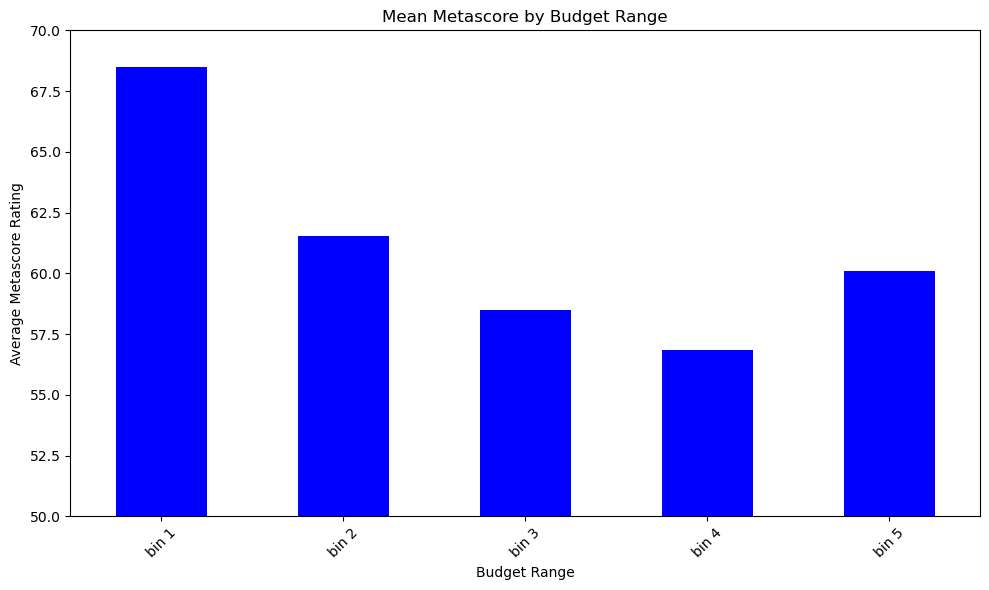

In [23]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_by_meta.plot(kind='bar', color='blue')
plt.xlabel("Budget Range")
plt.ylabel("Average Metascore Rating")
plt.ylim(50, 70)
plt.title("Mean Metascore by Budget Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\1501788904.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()


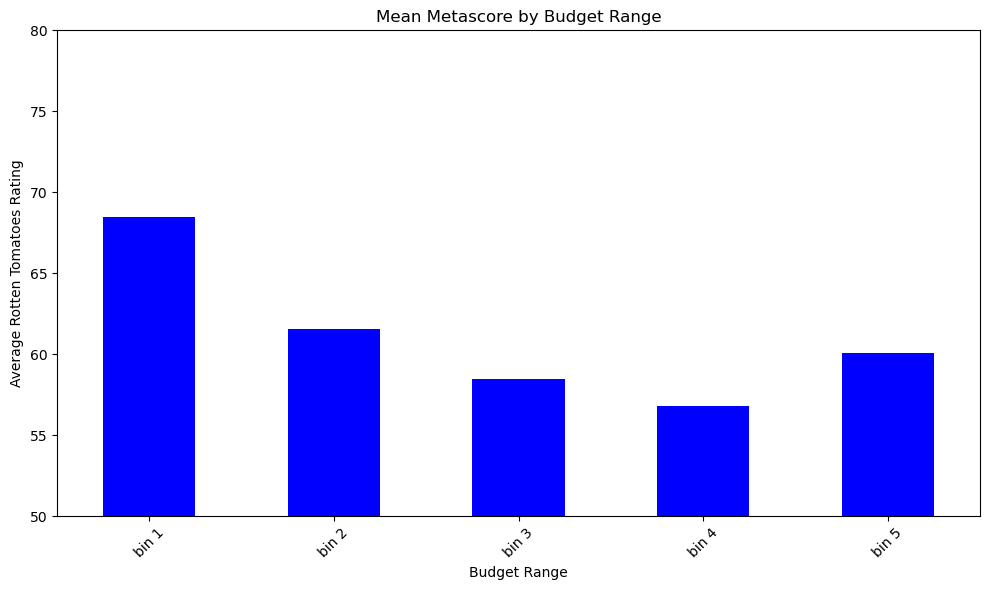

In [24]:
import matplotlib.pyplot as plt

# Calculate the mean Metascore for each budget bin
mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_by_meta.plot(kind='bar', color='blue')
plt.xlabel("Budget Range")
plt.ylabel("Average Rotten Tomatoes Rating")
plt.ylim(50, 80)
plt.title("Mean Metascore by Budget Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\2358026074.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()
C:\Users\stoyt\AppData\Local\Temp\ipykernel_2012\2358026074.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()


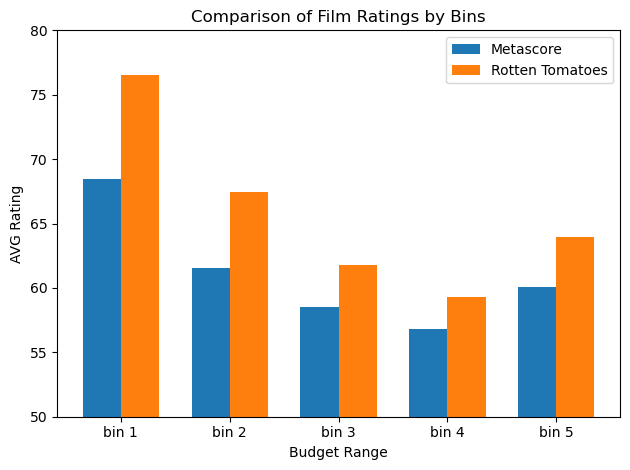

In [27]:
import matplotlib.pyplot as plt
import numpy as np

bins = sorted(budget_analysis_df["budget_bins"].unique())
mean_by_meta = budget_analysis_df.groupby("budget_bins")["Metascore"].mean()
mean_by_RT = budget_analysis_df.groupby("budget_bins")["Rotten Tomatoes Rating"].mean()

bar_width = 0.35

# Set the positions for the bars
x = np.arange(len(bins))

# Plot the bars for the first rating
plt.bar(x - bar_width/2, mean_by_meta, bar_width, label='Metascore')

# Plot the bars for the second rating
plt.bar(x + bar_width/2, mean_by_RT, bar_width, label='Rotten Tomatoes')

# Add labels, title, legend, etc.
plt.xlabel('Budget Range')
plt.ylabel('AVG Rating')
plt.ylim(50, 80)
plt.title('Comparison of Film Ratings by Bins')
plt.xticks(x, bins)  # Assuming bins are the labels for x-axis
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


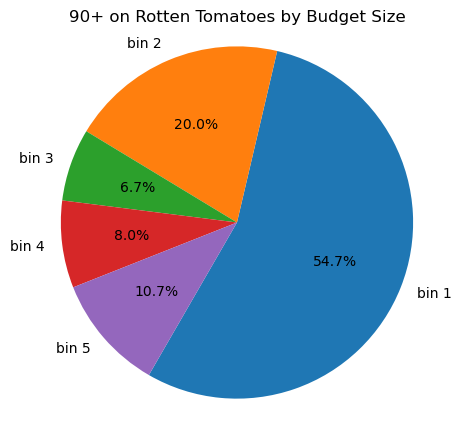

In [54]:
import matplotlib.pyplot as plt

# Assuming count_a_by_bin is your Series containing the counts
labels = count_a_by_bin.index  # Budget bins as labels
sizes = count_a_by_bin.values  # Counts as sizes

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=240)
plt.title('90+ on Rotten Tomatoes by Budget Size')
plt.axis('equal')
plt.show()